In [33]:
import pandas as pd
import numpy as np
import os
import glob
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = None

## Check if geopandas is installed
## import sys
## 'geopandas' in sys.modules

# Merge ICS 209 Plus Dataset to MTBS
# Assign ICS fires (not complexes) to appropriate MTBS perimeter
# Match ICS complex fires to MTBS perimeters

## Set Directory
path = '/data/yoder/DensityProject/'
os.chdir(path)
os.listdir()
# os.chdir("/scratch/Yoder")

['MTBS.zip',
 'mtbs_perimeter_data',
 'cb_2018_us_state_500k.zip',
 'cb_2018_us_state_500k.shp.ea.iso.xml',
 'cb_2018_us_state_500k.shp.iso.xml',
 'cb_2018_us_state_500k.shp',
 'cb_2018_us_state_500k.shx',
 'cb_2018_us_state_500k.dbf',
 'cb_2018_us_state_500k.prj',
 'cb_2018_us_state_500k.cpg',
 'ICS_209.zip',
 'ics209-plus-wildfire',
 '__MACOSX',
 'WestMTBS.shp',
 'WestMTBS.shx',
 'WestMTBS.dbf',
 'WestMTBS.cpg',
 'WestMTBS.prj',
 'slurm-16656468.out',
 'dask-worker-space',
 'ID_Zillow_pickled',
 'ID_fires']

In [2]:
# # Download MTBS Data
# import urllib.request
# from zipfile import ZipFile


# url = 'https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/MTBS_Fire/data/composite_data/burned_area_extent_shapefile/mtbs_perimeter_data.zip'
# urllib.request.urlretrieve(url, path+'MTBS.zip')
# ## UNZIP FILES
# # Specify zip file name
# file_name = "MTBS.zip"

# # Open zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
    
#     # extract all files
#     print('Extracting')
#     zip.extractall()
#     print("Done!")

In [3]:
# Read in MTBS Data
MTBS = geopandas.read_file(path + '/mtbs_perimeter_data/mtbs_perims_DD.shp')
MTBS

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,geometry
0,AK5674215793820060522,MESHIK RIVER,2006,5,22,Wildfire,1520.000000,"POLYGON ((-157.97298 56.74355, -157.97268 56.7..."
1,AK5759815753720050529,PILOT POINT,2005,5,29,Wildfire,4482.000000,"POLYGON ((-157.52934 57.61359, -157.52931 57.6..."
2,AK5761615232120150828,TWIN CREEKS,2015,8,28,Wildfire,3419.000000,"POLYGON ((-152.26796 57.62401, -152.26745 57.6..."
3,AK5884115754320150622,COPENHAGEN CREEK,2015,6,22,Wildfire,5335.000000,"POLYGON ((-157.54567 58.86262, -157.54487 58.8..."
4,AK5884415640120150621,PAULS CREEK,2015,6,21,Wildfire,9684.000000,"POLYGON ((-156.38570 58.88877, -156.38491 58.8..."
...,...,...,...,...,...,...,...,...
22962,WY4409110770020170623,HIDDEN DOME,2017,6,23,Wildfire,2852.204617,"POLYGON ((-107.65337 44.10316, -107.65118 44.1..."
22963,WY4443910972320170718,JUNE,2017,7,18,Wildfire,1418.873535,"POLYGON ((-109.69709 44.42745, -109.69712 44.4..."
22964,WY4468210625220170831,COTTONWOOD ONE,2017,8,31,Wildfire,4086.177893,"POLYGON ((-106.23932 44.71145, -106.23852 44.7..."
22965,WY4495610647120170831,DEER CREEK,2017,8,31,Wildfire,90147.414181,"POLYGON ((-106.49118 45.09516, -106.48936 45.0..."


In [4]:
# # Get map of US

# url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
# urllib.request.urlretrieve(url, path + '/cb_2018_us_state_500k.zip')

# ## UNZIP FILES
# # Specify zip file name
# file_name = "cb_2018_us_state_500k.zip"

# # Open zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
    
#     # extract all files
#     print('Extracting')
#     zip.extractall()
#     print("Done!")
    
# # Read in MTBS Data
# USMAP = geopandas.read_file(path + '/cb_2018_us_state_500k.shp')
# USMAP

In [34]:
# Load Map of US
USMAP = geopandas.read_file(path + '/cb_2018_us_state_500k.shp')
USMAP

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


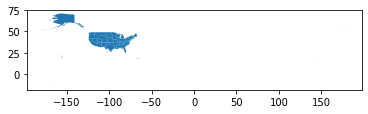

In [35]:
USMAP.plot()

In [36]:
USMAP.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
MTBS.crs

NameError: name 'MTBS' is not defined

In [ ]:
base = USMAP.plot(color = 'white', edgecolor = 'black')
MTBS.plot(ax=base, color = 'red')

In [38]:
# Create set of the 11 Western United States
West = ['WA', 'OR', 'CA', 'NV','AZ','NM', 'UT','CO','WY','ID','MT']
WestStates = USMAP[USMAP['STUSPS'].isin(West)]

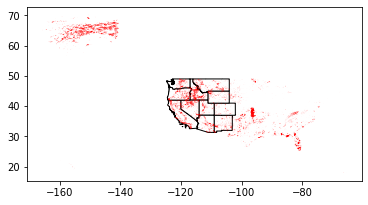

In [11]:
base = WestStates.plot(color = 'white', edgecolor = 'black')
MTBS.plot(ax=base, color = 'red')

In [12]:
# Select only western 11 fires based on spatial intersection (takes a few minutes)
WestMTBS = geopandas.overlay(MTBS, WestStates, how='intersection')

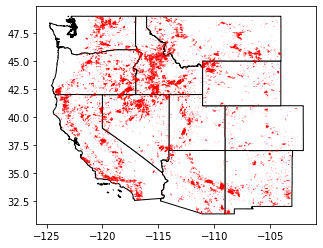

In [13]:
base = WestStates.plot(color = 'white', edgecolor = 'black')
WestMTBS.plot(ax=base, color = 'red')

In [14]:
# WestMTBS.to_file("/data/yoder/DensityProject/WestMTBS.shp")

In [15]:
## Get ICS 209 Data from Denis et al. 2020

##  
"""  

Link to files
https://figshare.com/articles/ICS209-PLUS_Cleaned_databases/8048252/14

Link to paper
https://www.researchgate.net/publication/339411650_All-hazards_dataset_mined_from_the_US_National_Incident_Management_System_1999-2014

St Denis, Lise & Mietkiewicz, Nathan & Short, Karen & Buckland, Mollie & Balch, Jennifer. (2020). 
All-hazards dataset mined from the US National Incident Management System 1999–2014. 
Scientific Data. 7. 10.1038/s41597-020-0403-0. 
"""



# import urllib.request
# from zipfile import ZipFile


# url = 'https://ndownloader.figshare.com/files/21491724'
# urllib.request.urlretrieve(url, path+f'ICS_209.zip')




## UNZIP FILES
## Specify zip file name
# os.chdir(path)
# file_name =  "ICS_209.zip"

# # Open zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
    
#     # extract all files
#     print('Extracting')
#     zip.extractall()
#     print("Done!")
    
# for file in glob.glob(path + '/ics209-plus-wildfire/*'):
#     print(file)

# Read in 209 Data
# ICS_209_inci = pd.read_csv(path + '/ics209-plus-wildfire/ics209-plus-wf_incidents_1999to2014.csv')
# ICS_209_inci 

'  \n\nLink to files\nhttps://figshare.com/articles/ICS209-PLUS_Cleaned_databases/8048252/14\n\nLink to paper\nhttps://www.researchgate.net/publication/339411650_All-hazards_dataset_mined_from_the_US_National_Incident_Management_System_1999-2014\n\nSt Denis, Lise & Mietkiewicz, Nathan & Short, Karen & Buckland, Mollie & Balch, Jennifer. (2020). \nAll-hazards dataset mined from the US National Incident Management System 1999–2014. \nScientific Data. 7. 10.1038/s41597-020-0403-0. \n'

In [16]:
# Read in 209 Data
ICS_209_inci = pd.read_csv(path + '/ics209-plus-wildfire/ics209-plus-wf_incidents_1999to2014.csv')
ICS_209_inci 

/opt/apps/anaconda3/20.02.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,13,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE
0,0,1999_AK-AIC-B251_MINTO,AK-AIC-B251,MINTO,WF,3800.0,H,False,1999-06-14 00:00:00,165,1999-06-24 00:00:00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65.150000,-149.366667,Minto,AK,971270.0,1999.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1999-06-25 00:00:00,12,NaN,NaN,NaN,NaN,27.0,2489.000000,4.0,1999-06-17 00:00:00,168,265.000000,1999-06-23 00:00:00,174,1999-06-17 00:00:00,168.0,1500.0,1999-06-14 00:00:00,165,3.0,1.0,164.0,179.0,5,Debris Burning,3876.0,NaN,"[{""ID"" : 214512, ""MTBS_ID"" : ""AK65126149404199...","['{""ID"" : 214512, ""MTBS_ID"" : ""AK6512614940419...",214512.0,AK6512614940419990613,MINTO,65.149500,-149.369100
1,1,1999_AK-ARM-B222_DONNELLY FLATS,AK-ARM-B222,DONNELLY FLATS,WF,18000.0,H,False,1999-06-11 00:00:00,162,1999-06-21 00:00:00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,63.833333,-145.700000,10 Miles South of Fort Greely,AK,4693940.0,1999.0,NaN,0.0,0.0,0.0,3.0,0.0,1.0,1999-06-23 00:00:00,13,NaN,NaN,NaN,NaN,40.0,4889.000000,6.0,1999-06-13 00:00:00,164,589.000000,1999-06-17 00:00:00,168,1999-06-18 00:00:00,169.0,7820.0,1999-06-15 00:00:00,166,7.0,1.0,162.0,266.0,7,Arson,18720.0,NaN,"[{""ID"" : 214500, ""MTBS_ID"" : ""AK63915145731199...","['{""ID"" : 214500, ""MTBS_ID"" : ""AK6391514573119...",214500.0,AK6391514573119990611,DONNELLY FLATS,63.816300,-145.669000
2,2,1999_AK-GAD-B447_ROUNDABOUT MOUNTAIN,AK-GAD-B447,ROUNDABOUT MOUNTAIN,WF,6600.0,L,False,1999-07-11 00:00:00,192,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65.583333,-156.466667,10 MILES SOUTH OF HUSLIA,AK,NaN,1999.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1999-07-20 00:00:00,7,NaN,NaN,NaN,NaN,11.0,683.000000,2.0,1999-07-14 00:00:00,195,101.000000,1999-07-14 00:00:00,195,1999-07-16 00:00:00,197.0,2270.0,1999-07-16 00:00:00,197,5.0,1.0,192.0,221.0,1,Lightning,5763.0,NaN,"[{""ID"" : 214588, ""MTBS_ID"" : ""AK65584156460199...","['{""ID"" : 214588, ""MTBS_ID"" : ""AK6558415646019...",214588.0,AK6558415646019990711,ROUNDABOUT MOUNTAIN,65.582700,-156.469200
3,3,1999_AK-STA-901106_HELMAUR (CLARK WOLVERINE),AK-STA-901106,HELMAUR (CLARK WOLVERINE),WF,221.0,H,False,1999-05-18 00:00:00,138,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.666667,-149.000000,NE OF ANCHORAGE,AK,NaN,1999.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1999-05-20 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-20 00:00:00,140,NaN,1999-05-20 00:00:00,140,1999-05-20 00:00:00,140.0,110.5,1999-05-20 00:00:00,140,2.0,1.0,138.0,NaN,5,Debris Burning,227.0,NaN,"[{""ID"" : 403096, ""COORDS"" : (61.67199, -149.03...","['{""ID"" : 403096, ""COORDS"" : (61.67199, -149.0...",403096.0,NaN,NaN,61.671990,-149.034700
4,4,1999_AK-STA-901107_EKLUTNA,AK-STA-901107,EKLUTNA,WF,383.0,H,False,1999-05-18 00:00:00,138,1999-05-21 00:00:00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.433333,-149.200000,NE of Anchorage,AK,507526.0,1999.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1999-05-24 00:00:00,6,NaN,NaN,NaN,NaN,18.0,992.000000,4.0,1999-05-20 00:00:00,140,255.000000,1999-05-23 00:00:00,143,19

In [17]:
# Create GeoDataFrame from ICS data
ICS = geopandas.GeoDataFrame(ICS_209_inci, geometry=geopandas.points_from_xy(ICS_209_inci.POO_LONGITUDE , ICS_209_inci.POO_LATITUDE))

In [18]:
# base = WestStates.plot(color = 'white', edgecolor = 'black')
# WestMTBS.plot(ax=base, color = 'red')
# ICS.plot(ax=base, color = 'blue')

In [19]:
#### Select ICS forms for 11 Western United States
# WestICS = ICS[ICS['INCIDENT_NUMBER'].str[:2].isin(West)].copy()
# WestICS
## MISSES SOME 2014 Fires --> Use method below

#### Select ICS forms for 11 Western United States (10319 fires)
WestICS = ICS[ICS['POO_STATE'].isin(West)].copy()
# WestICS

In [20]:
# base = WestStates.plot(color = 'white', edgecolor = 'black')
# WestMTBS.plot(ax=base, color = 'red')
# WestICS.plot(ax=base, color = 'blue', markersize = 1)#.01)

In [21]:
#### Check for just Idaho

# IdahoMap = USMAP[USMAP['STUSPS']== 'ID']
# IdahoMTBS = geopandas.overlay(MTBS, IdahoMap, how='intersection')
# IdahoICS = ICS[ICS['INCIDENT_NUMBER'].str[:2]=='ID']

width = 50
height = 50
plt.rcParams['figure.figsize'] = [width, height]

# # Plot Idaho
# base = IdahoMap.plot(color = 'white', edgecolor = 'black')
# IdahoMTBS.plot(ax=base, color = 'red')
# IdahoICS.plot(ax=base, color = 'blue', markersize = 100)

In [22]:
# WestICS['START_YEAR'].describe()

In [23]:
#WestICS.groupby('START_YEAR').count()['STR_DAMAGED_TOTAL'].plot()
# WestICS.groupby('START_YEAR').count()

In [24]:
### Merge ICS and MTBS data
# WestStates
# WestMTBS
# WestICS

In [25]:
ICBS = pd.merge(WestMTBS, WestICS, left_on='Fire_ID', right_on='MTBS_ID', suffixes =('_from_MTBS','_from_ICS'))
ICBS

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.0,NaN,2012-05-08 20:30:00,129,122.0,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000)
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.0,2.0,2011-05-23 20:00:00,143,377.0,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889)
2,AZ3134011074320110214,DUQUESNE,2011,2,14,Wildfire,1962.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.76026 31.33355, -110.76027 31.3...",18121,2011_AZ-CNF-011011_DUQUESNE,AZ-CNF-011011,DUQUESNE,WF,1995.0,H,False,2011-02-14 00:00:00,45,2011-02-22 00:00:00,0.0,"Dormant Brush, Hardwood Slash",NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.339722,-110.742500,EAST OF NOGALES,AZ,174500.0,2011.0,C,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-22 07:30:00,8,False,40.0,NaN,20.0,2.0,444.0,1.0,2011-02-15 18:45:00,46,147.0,2011-02-15 18:45:00,46,2011-02-16 17:45:00,47.0,1300.0,2011-02-15 18:45:00,46,2.0,1.0,45.0,53.0,9,Miscellaneous,1995.0,NaN,"[{""ID"" : 20026576, ""MTBS_ID"" : ""AZ313401107432...","['{""ID"" : 20026576, ""MTBS_ID"" : ""AZ31340110743...",20026576.0,AZ3134011074320110214,DUQUESNE,31.339444,-110.742500,POINT (-110.74250 31.33972)
3,AZ3134111110120110429,BULL,2011,4,29,Wildfire,16340.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON

In [26]:
from shapely.geometry import Point, Polygon

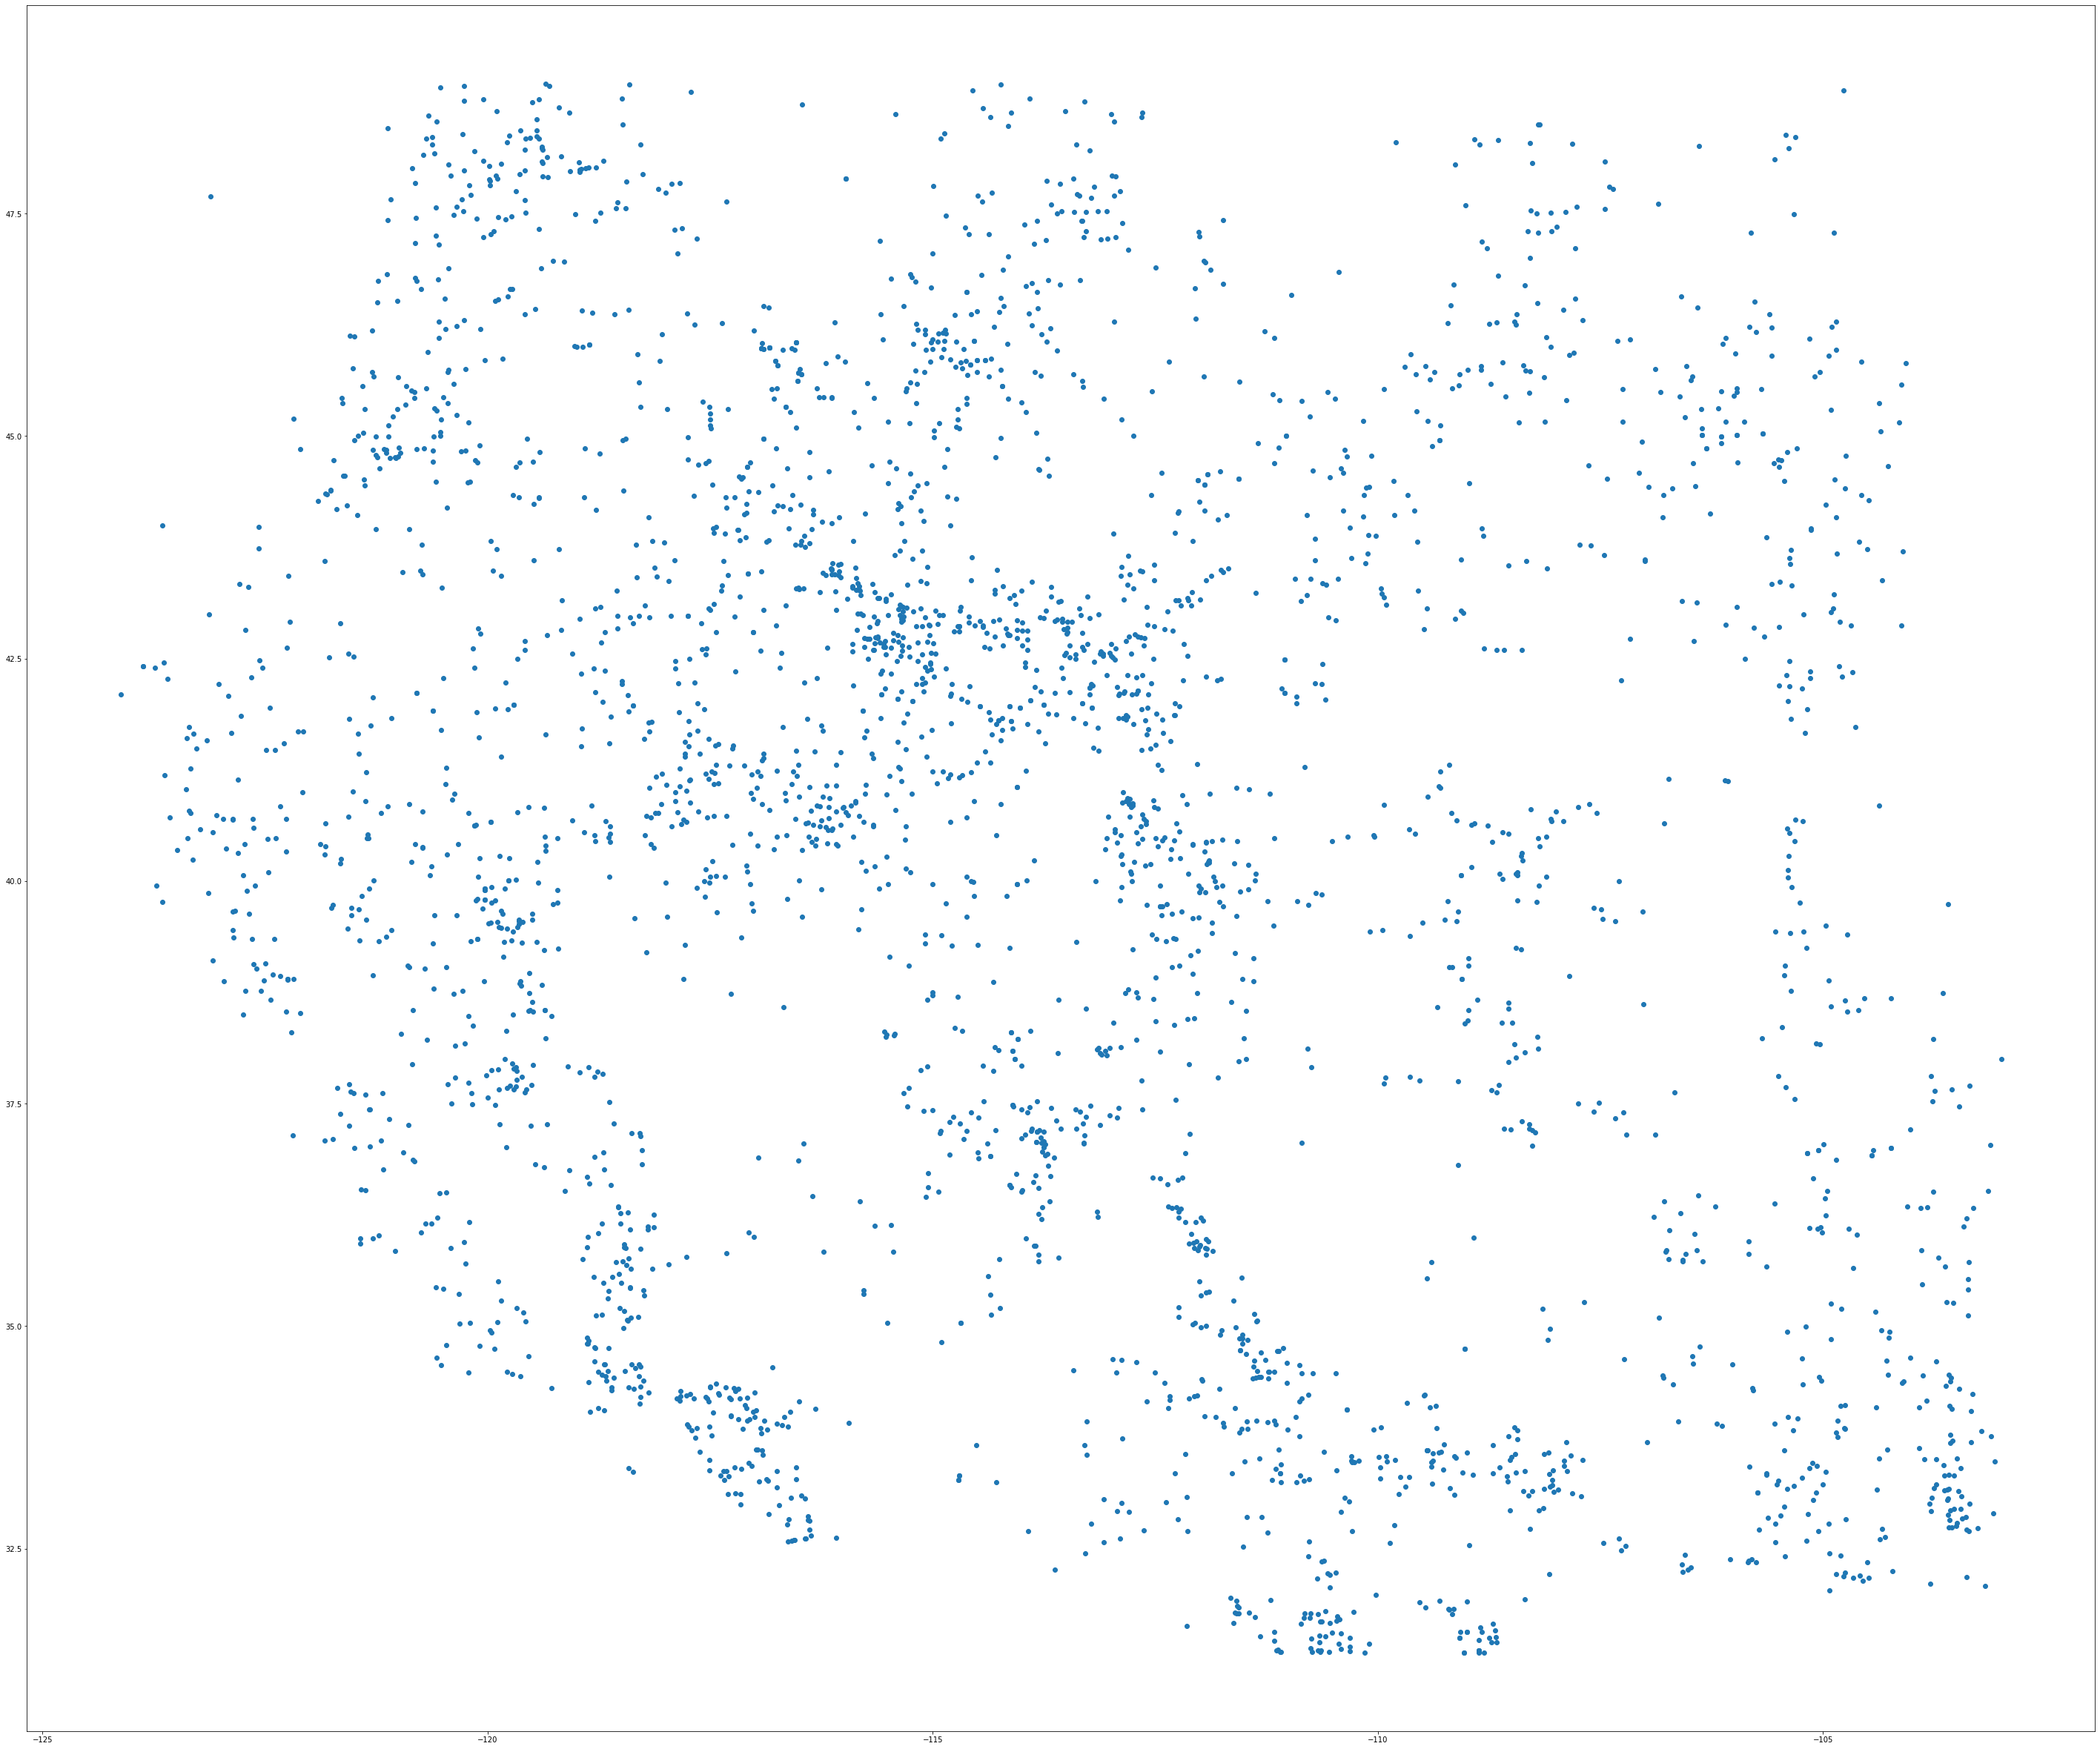

In [27]:
ICBS['geometry'] = ICBS['geometry_from_ICS']
ICBS.plot()

In [28]:
ICBS.columns

Index(['Fire_ID', 'Fire_Name', 'Year', 'StartMonth', 'StartDay', 'Fire_Type',
       'Acres', 'STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'ALAND', 'AWATER', 'geometry_from_MTBS', 'Unnamed: 0',
       'INCIDENT_ID', 'INCIDENT_NUMBER', 'INCIDENT_NAME',
       'INCTYP_ABBREVIATION', 'FINAL_ACRES', 'CAUSE', 'COMPLEX',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'EXPECTED_CONTAINMENT_DATE',
       'FATALITIES', 'FUEL_MODEL', 'INCIDENT_DESCRIPTION', 'INC_IDENTIFIER',
       'INJURIES_TOTAL', 'LL_CONFIDENCE', 'LL_UPDATE', 'LOCAL_TIMEZONE',
       'POO_CITY', 'POO_COUNTY', 'POO_LATITUDE', 'POO_LONGITUDE',
       'POO_SHORT_LOCATION_DESC', 'POO_STATE', 'PROJECTED_FINAL_IM_COST',
       'START_YEAR', 'SUPPRESSION_METHOD', 'STR_DAMAGED_TOTAL',
       'STR_DAMAGED_COMM_TOTAL', 'STR_DAMAGED_RES_TOTAL',
       'STR_DESTROYED_TOTAL', 'STR_DESTROYED_COMM_TOTAL',
       'STR_DESTROYED_RES_TOTAL', 'FINAL_REPORT_DATE', 'INC_MGMT_NUM_SITREPS',
       'EVACUATION_REPORTED', 'S

In [29]:
ICBS['geometry'] = ICBS['geometry_from_MTBS']

In [30]:
# base = WestStates.plot(color = 'white', edgecolor = 'black')
# # WestMTBS.plot(ax=base, color = 'red')
# # WestICS.plot(ax=base, color = 'blue', markersize = 1)#.01)
# ICBS.plot(ax = base)

In [31]:
ICBS.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
## Create North America Albers Equal Area Conic projection
albers_txt = "+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"

In [40]:
WestStates_albers = WestStates.to_crs(albers_txt)

In [34]:
ICBS_albers = ICBS.copy()
ICBS_albers.head(2)

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.0,NaN,2012-05-08 20:30:00,129,122.0,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000),"POLYGON ((-110.43139 31.33293, -110.43136 31.3..."
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.0,2.0,2011-05-23 20:00:00,143,377.0,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889),"POLYGON ((-110.45738 31.42441, -110.45735 31.4..."


In [35]:
ICBS_albers = ICBS.copy()
ICBS_albers['geometry'] = ICBS_albers['geometry_from_MTBS'].copy()
ICBS_albers['geometry'] = ICBS_albers['geometry'].to_crs(albers_txt)
ICBS_albers['geometry_MTBS_albers'] = ICBS_albers['geometry']

WestStates_albers = WestStates.copy()
WestStates_albers['geometry'] = WestStates_albers['geometry'].to_crs(albers_txt)

# base = WestStates_albers.plot(color = 'white', edgecolor = 'black')
# ICBS_albers.plot(ax = base, color = 'red')


ICBS_albers['geometry'] = ICBS_albers['geometry_from_ICS'].copy()
ICBS_albers['geometry'] = ICBS_albers['geometry'].to_crs(albers_txt)
ICBS_albers['geometry_ICS_albers'] = ICBS_albers['geometry'].copy()
# ICBS_albers.plot(ax = base, color = 'blue')
# plt.show()
ICBS_albers

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry,geometry_MTBS_albers,geometry_ICS_albers
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.0,NaN,2012-05-08 20:30:00,129,122.0,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000),POINT (-1306972.809 -910788.393),"POLYGON ((-1309374.262 -914765.342, -1309364.9...",POINT (-1306972.809 -910788.393)
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.0,2.0,2011-05-23 20:00:00,143,377.0,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889),POINT (-1319570.646 -912496.148),"POLYGON ((-1310102.978 -903929.086, -1310103.1...",POINT (-1319570.646 -912496.148)
2,AZ3134011074320110214,DUQUESNE,2011,2,14,Wildfire,1962.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.76026 31.33355, -110.76027 31.3...",18121,2011_AZ-CNF-011011_DUQUESNE,AZ-CNF-011011,DUQUESNE,WF,1995.0,H,False,2011-02-14 00:00:00,45,2011-02-22 00:00:00,0.0,"Dormant Brush, Hardwood Slash",NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.339722,-110.742500,EAST OF NOGALES,AZ,174500.0,2011.0,C,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-22 07:30:00,8,False,40.0,NaN,20.0,2.0,444.0,1.0,2011-02-15 18:45:00,46,147.0,2011-02-15 18:45:00,46,2011-02-16 17:45:00,47.0,1300.0,2011-02-15 18:45:00,46,2.0,1.0,45.0,53.0,9,Miscellaneous,1995.0,NaN,"[{""ID"" : 20026576, ""MTBS_ID"" : ""AZ313401107

In [36]:
ICBS_albers['geometry'] = ICBS_albers['geometry_MTBS_albers'].copy()

def get_distance(row):
    distance = row.geometry.distance(row.geometry_ICS_albers)
#     print(distance)
    return distance

ICBS_albers['Perim_to_POO'] = ICBS_albers.apply(lambda row: get_distance(row), axis = 1)

POO_inside = ICBS_albers[ICBS_albers['Perim_to_POO'] == 0].copy()
POO_within100m = ICBS_albers[ICBS_albers['Perim_to_POO'] <=100].copy()

In [37]:
POO_inside['geometry'] = POO_inside['geometry_ICS_albers']

In [38]:
POO_within100m.head(2)

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry,geometry_MTBS_albers,geometry_ICS_albers,Perim_to_POO
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.0,NaN,2012-05-08 20:30:00,129,122.0,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000),"POLYGON ((-1309374.262 -914765.342, -1309364.9...","POLYGON ((-1309374.262 -914765.342, -1309364.9...",POINT (-1306972.809 -910788.393),0.0
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.0,2.0,2011-05-23 20:00:00,143,377.0,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889),"POLYGON ((-1310102.978 -903929.086, -1310103.1...","POLYGON ((-1310102.978 -903929.086, -1310103.1...",POINT (-1319570.646 -912496.148),0.0


In [39]:
POO_inside.head(2)

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry,geometry_MTBS_albers,geometry_ICS_albers,Perim_to_POO
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.0,NaN,2012-05-08 20:30:00,129,122.0,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000),POINT (-1306972.809 -910788.393),"POLYGON ((-1309374.262 -914765.342, -1309364.9...",POINT (-1306972.809 -910788.393),0.0
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.0,2.0,2011-05-23 20:00:00,143,377.0,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889),POINT (-1319570.646 -912496.148),"POLYGON ((-1310102.978 -903929.086, -1310103.1...",POINT (-1319570.646 -912496.148),0.0


In [40]:
# ## Plot only fires with POO within Perimeter
# POO_inside['geometry'] = POO_inside['geometry_MTBS_albers']
# base = WestStates_albers.plot(color = 'white', edgecolor = 'black')
# POO_inside.plot(ax = base, color = 'red')
# POO_inside['geometry'] = POO_inside['geometry_ICS_albers']
# POO_inside.plot(ax = base, color = 'blue')

In [41]:
Fires = POO_inside.copy()

In [42]:
Fires.describe()

,Year,StartMonth,StartDay,Acres,ALAND,AWATER,Unnamed: 0,FINAL_ACRES,DISCOVERY_DOY,FATALITIES,INC_IDENTIFIER,INJURIES_TOTAL,POO_LATITUDE,POO_LONGITUDE,PROJECTED_FINAL_IM_COST,START_YEAR,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,INC_MGMT_NUM_SITREPS,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_FIRE_SIZE,FOD_ID,FOD_LATITUDE,FOD_LONGITUDE,Perim_to_POO
count,1577.00000,1577.000000,1577.000000,1577.000000,1.577000e+03,1.577000e+03,1577.000000,1577.000000,1577.000000,1577.000000,9.600000e+01,1577.000000,1577.000000,1577.000000,1.257000e+03,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,959.000000,378.000000,815.000000,1103.000000,1505.000000,1103.000000,1577.000000,1505.000000,1577.000000,1576.000000,1577.000000,1577.000000,1576.000000,1577.0,1577.000000,1470.000000,1577.000000,1.577000e+03,1577.000000,1577.000000,1577.0
mean,2007.11097,7.195942,15.661382,14977.280913,2.819800e+11,5.525364e+09,12098.979074,13831.331959,203.162968,0.031072,6.614022e+05,1.308180,40.477350,-113.755976,3.958366e+06,2007.110336,0.776157,0.038681,0.367153,7.928345,0.111604,4.724160,11.867470,357.655892,41.060847,318.000000,48.598081,3797.947638,5.304699,207.726696,351.614617,209.161699,213.311548,5917.355618,208.385542,10.131345,1.0,203.249207,227.006803,13896.969252,6.002116e+07,40.477059,-113.757975,0.0
std,4.20611,1.448449,8.840779,41097.700143,6.834758e+10,6.200317e+09,7165.080445,38594.176475,43.903080,0.425606,1.438030e+05,4.636277,4.720172,4.939828,1.426720e+07,4.207107,5.333782,0.632576,3.159308,81.857554,1.110162,64.653641,13.547278,1786.822351,190.815211,1553.437279,123.356646,11744.354145,6.931685,44.827555,572.505871,45.245606,48.263444,14679.713585,45.428568,18.523667,0.0,43.883549,53.863263,38577.721304,1.008582e+08,4.720674,4.940390,0.0
min,1999.00000,1.000000,1.000000,1002.000000,1.721126e+11,7.287765e+08,17.000000,0.000000,6.000000,0.000000,2.491400e+05,0.000000,31.333333,-124.116667,2.000000e+00,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,7.000000,6.000000,0.000000,6.000000,-41.000000,1.0,6.000000,7.000000,235.000000,7.570000e+02,31.335100,-124.117778,0.0
25%,2004.00000,7.000000,8.000000,1938.000000,2.140498e+11,1.867671e+09,5581.000000,1850.000000,183.000000,0.000000,5.796458e+05,0.000000,36.515278,-117.516389,1.400000e+05,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000,4.000000,4.000000,120.000000,2.000000,185.000000,51.000000,186.000000,187.000000,1000.000000,185.000000,1.000000,1.0,183.000000,197.000000,1836.000000,2.435150e+05,36.523300,-117.514184,0.0
50%,2007.00000,7.000000,15.000000,4172.000000,2.843295e+11,2.391723e+09,11854.000000,3890.000000,206.000000,0.000000,6.508630e+05,0.000000,40.861389,-113.999722,7.530000e+05,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,21.000000,5.000000,17.000000,15.000000,568.000000,3.000000,211.000000,147.333333,213.000000,216.000000,2000.000000,212.000000,3.000000,1.0,206.000000,226.000000,3930.000000,3.559800e+05,40.862440,-114.000500,0.0
75%,2011.00000,8.000000,23.000000,10555.000000,3.141963e+11,6.998824e+09,18697.000000,9813.000000,229.000000,0.000000,7.348288e+05,1.000000,44.237500,-110.513333,3.238952e+06,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,105.000000,20.000000,100.000000,40.000000,2511.000000,6.000000,235.000000,420.000000,237.000000,242.000000,5000.000000,236.000000,9.000000,1.0,229.000000,263.000000,9837.000000,2.011084e+08,44.239910,-110.513333,0.0
max,2014.00000,12.000000,31.000000,563664.0000

In [43]:
Fires['geometry'] = Fires['geometry_ICS_albers']
Fires

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry,geometry_MTBS_albers,geometry_ICS_albers,Perim_to_POO
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.000000,NaN,2012-05-08 20:30:00,129,122.000000,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000),POINT (-1306972.809 -910788.393),"POLYGON ((-1309374.262 -914765.342, -1309364.9...",POINT (-1306972.809 -910788.393),0.0
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.000000,2.0,2011-05-23 20:00:00,143,377.000000,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889),POINT (-1319570.646 -912496.148),"POLYGON ((-1310102.978 -903929.086, -1310103.1...",POINT (-1319570.646 -912496.148),0.0
2,AZ3134011074320110214,DUQUESNE,2011,2,14,Wildfire,1962.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.76026 31.33355, -110.76027 31.3...",18121,2011_AZ-CNF-011011_DUQUESNE,AZ-CNF-011011,DUQUESNE,WF,1995.0,H,False,2011-02-14 00:00:00,45,2011-02-22 00:00:00,0.0,"Dormant Brush, Hardwood Slash",NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.339722,-110.742500,EAST OF NOGALES,AZ,174500.0,2011.0,C,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-22 07:30:00,8,False,40.0,NaN,20.0,2.0,444.000000,1.0,2011-02-15 18:45:00,46,147.000000,2011-02-15 18:45:00,46,2011-02-16 17:45:00,47.0,1300.0,2011-02-15 18:45:00,46,2.0,1.0,45.0,53.0,9,Miscellaneous,1995.0,Na

In [44]:
os.getcwd()

'/data/yoder/DensityProject'

## Zillow Data

In [45]:
## Go to Zillow Data (unzipped)

## Set Directory
path = '/data/yoder/ZillowAccessor_2001_2014/'
os.chdir(path)
# os.listdir()



In [46]:
# Create Dictionary for State Abbreviations and Zillow numbers

States = {}
for p in glob.glob('/data/yoder/ZillowAccessor_2001_2014/*'):  
    try:
        df = pd.read_csv(p+'/ZAsmt\Main.txt', delimiter="|", header=None, nrows=100)
        States[p] = df.iloc[0,3]
#         print(p)
    except:
#         print("failed")
        pass
        
st = {value:key for key, value in States.items()}
dict(sorted(st.items()))

{'AK': '/data/yoder/ZillowAccessor_2001_2014/02',
 'AL': '/data/yoder/ZillowAccessor_2001_2014/01',
 'AR': '/data/yoder/ZillowAccessor_2001_2014/05',
 'AZ': '/data/yoder/ZillowAccessor_2001_2014/04',
 'CA': '/data/yoder/ZillowAccessor_2001_2014/06',
 'CO': '/data/yoder/ZillowAccessor_2001_2014/08',
 'CT': '/data/yoder/ZillowAccessor_2001_2014/09',
 'DC': '/data/yoder/ZillowAccessor_2001_2014/11',
 'DE': '/data/yoder/ZillowAccessor_2001_2014/10',
 'FL': '/data/yoder/ZillowAccessor_2001_2014/12',
 'GA': '/data/yoder/ZillowAccessor_2001_2014/13',
 'GU': '/data/yoder/ZillowAccessor_2001_2014/66',
 'HI': '/data/yoder/ZillowAccessor_2001_2014/15',
 'IA': '/data/yoder/ZillowAccessor_2001_2014/19',
 'ID': '/data/yoder/ZillowAccessor_2001_2014/16',
 'IL': '/data/yoder/ZillowAccessor_2001_2014/17',
 'IN': '/data/yoder/ZillowAccessor_2001_2014/18',
 'KS': '/data/yoder/ZillowAccessor_2001_2014/20',
 'KY': '/data/yoder/ZillowAccessor_2001_2014/21',
 'LA': '/data/yoder/ZillowAccessor_2001_2014/22',


In [41]:
## Select only Western States

West = ['WA', 'OR', 'CA', 'NV','AZ','NM', 'UT','CO','WY','ID','MT']
WestStatesList = [st[x] for x in st if x in West]
WestStatesDict = {x:st[x] for x in West}
WestStatesDict

NameError: name 'st' is not defined

In [48]:
## Grab Idaho (for now)
st['ID']

'/data/yoder/ZillowAccessor_2001_2014/16'

In [49]:
subpath = st['ID']
os.chdir(subpath)
os.listdir()

['ZAsmt\\Building.txt',
 'ZAsmt\\BuildingAreas.txt',
 'ZAsmt\\Garage.txt',
 'ZAsmt\\LotSiteAppeal.txt',
 'ZAsmt\\Main.txt',
 'ZAsmt\\Value.txt',
 'ID_sample',
 'ID_all',
 'ID_latLongsonly.csv']

In [50]:
# ####  Load dataframes for each state:
Frames=[]

Main=pd.read_csv("ZAsmt\\Main.txt", sep="|", header=None) #, encoding='latin1')
print("Loaded Main")
Building=pd.read_csv("ZAsmt\\Building.txt", sep="|", header=None)
print("Loaded Building")
BuildingAreas=pd.read_csv("ZAsmt\\BuildingAreas.txt", sep="|", header=None)
print("Loaded Building Areas")
Garage=pd.read_csv("ZAsmt\\Garage.txt", sep= "|", header=None)
print("Loaded Garage")
LotSiteAppeal=pd.read_csv("ZAsmt\\LotSiteAppeal.txt", sep="|", header=None)
print("Loaded LotSiteAppeal")
Value=pd.read_csv("ZAsmt\\Value.txt", sep="|", header=None)
print("Loaded Value")

## Label columns using excel table with list of columnn names
def NameCols(dataframe, dictname):
    xls=pd.ExcelFile(path+f'ZAsmt_dicts/{dictname}.xlsx')
    df=xls.parse(xls.sheet_names[0])
    df.to_dict()
    dataframe.columns = dataframe.columns.to_series().map(df['FieldName'])
    

NameCols(Main, 'utMain')   
NameCols(Building, 'utBuilding')
NameCols(BuildingAreas, 'utBuildingArea')
NameCols(Garage, 'utGarage')
NameCols(Value, 'utValue')
NameCols(LotSiteAppeal,'utLotSiteAppeal')

/opt/apps/anaconda3/20.02.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,10,13,14,15,20,25,29,30,34,37,44,45,46,47,50,52,53,54,55,56,59,65,67,73,74,77,78,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loaded Main


/opt/apps/anaconda3/20.02.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,7,9,10,12,30,33,34,35,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loaded Building
Loaded Building Areas
Loaded Garage
Loaded LotSiteAppeal
Loaded Value


In [51]:
Main.head()

,RowID,ImportParcelID,FIPS,State,County,ValueCertDate,ExtractDate,Edition,ZVendorStndCode,AssessorParcelNumber,DupAPN,UnformattedAssessorParcelNumber,ParcelSequenceNumber,AlternateParcelNumber,OldParcelNumber,ParcelNumberTypeStndCode,RecordSourceStndCode,RecordTypeStndCode,ConfidentialRecordFlag,PropertyAddressSourceStndCode,PropertyHouseNumber,PropertyHouseNumberExt,PropertyStreetPreDirectional,PropertyStreetName,PropertyStreetSuffix,PropertyStreetPostDirectional,PropertyFullStreetAddress,PropertyCity,PropertyState,PropertyZip,PropertyZip4,OriginalPropertyFullStreetAddress,OriginalPropertyAddressLastline,PropertyBuildingNumber,PropertyZoningDescription,PropertyZoningSourceCode,CensusTract,TaxIDNumber,TaxAmount,TaxYear,TaxDelinquencyFlag,TaxDelinquencyAmount,TaxDelinquencyYear,TaxRateCodeArea,LegalLot,LegalLotStndCode,LegalOtherLot,LegalBlock,LegalSubdivisionCode,LegalSubdivisionName,LegalCondoProjectPUDDevName,LegalBuildingNumber,LegalUnit,LegalSection,LegalPhase,LegalTract,LegalDistrict,LegalMunicipality,LegalCity,LegalTownship,LegalSTRSection,LegalSTRTownship,LegalSTRRange,LegalSTRMeridian,LegalSecTwnRngMer,LegalRecordersMapReference,LegalDescription,LegalNeighborhoodSourceCode,NoOfBuildings,LotSizeAcres,LotSizeSquareFeet,LotSizeFrontageFeet,LotSizeDepthFeet,LotSizeIRR,LotSiteTopographyStndCode,LoadID,PropertyAddressMatchcode,PropertyAddressUnitDesignator,PropertyAddressUnitNumber,PropertyAddressCarrierRoute,PropertyAddressGeoCodeMatchCode,PropertyAddressLatitude,PropertyAddressLongitude,PropertyAddressCensusTractAndBlock,PropertyAddressConfidenceScore,PropertyAddressCBSACode,PropertyAddressCBSADivisionCode,PropertyAddressMatchType,PropertyAddressDPV,PropertyGeocodeQualityCode,PropertyAddressQualityCode,SubEdition,BatchID,BKFSPID,SourceChkSum
0,4D27FB96-33D5-E511-80C1-3863BB43AC67,41374582,16009,ID,BENEWAH,2013-01-01,92013,4,BKF,LP010100 A,NaN,LP010100A,1,NaN,NaN,NaN,NaN,NaN,,P,205,NaN,NaN,ROCKY POINT LOOP,RD,NaN,205 ROCKY POINT LOOP RD,PLUMMER,ID,83851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,90000,1,NaN,NaN,A,NaN,ROCKY POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROCKY POINT BLOCK A LOT 1,600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42008003,Y,NaN,NaN,R001,Y,47.355227,-116.746385,160099400.005018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1855,-1,1.244877e+09
1,4E27FB96-33D5-E511-80C1-3863BB43AC67,41374583,16009,ID,BENEWAH,2013-01-01,92013,4,BKF,LP010200 A,NaN,LP010200A,1,NaN,NaN,NaN,NaN,NaN,,P,199,NaN,NaN,ROCKY POINT LOOP,RD,NaN,199 ROCKY POINT LOOP RD,PLUMMER,ID,83851,9786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,90000,2,NaN,NaN,A,NaN,ROCKY POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROCKY POINT BLOCK A LOT 2 GF,600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42008004,Y,NaN,NaN,R001,Y,47.355169,-116.746458,160099400.005018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1855,-1,1.620730e+09
2,4F27FB96-33D5-E511-80C1-3863BB43AC67,41374584,16009,ID,BENEWAH,2013-01-01,92013,4,BKF,LP010300 A,NaN,LP010300A,1,NaN,NaN,NaN,NaN,NaN,,P,185,NaN,NaN,ROCKY POINT LOOP,RD,NaN,185 ROCKY POINT LOOP RD,PLUMMER,ID,83851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,90000,3,NaN,NaN,A,NaN,ROCKY POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROCKY POINT BLOCK A LOT 3,600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42008005,Y,NaN,NaN,R001,Y,47.355031,-116.746628,160099400.005018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1855,-1,2.112791e+09
3,5027FB96-33D5-E511-80C1-3863BB43AC67,41374585,16009,ID,BENEWAH,2013-01-01,92013,4,BKF,LP010400 A,NaN,LP010400A,1,NaN,NaN,NaN,NaN,NaN,,P,173,NaN,NaN,ROCKY POINT LOOP,RD,NaN,173 ROCKY POINT LOOP RD,PLUMMER,ID,83851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,90000,4,NaN,NaN,A,NaN,ROCKY POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROCKY POINT BLOCK A LOT 4,600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42008006,Y,NaN,NaN,R001,Y,47.354914,-116.746774,160099400.005018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1855,-1,-1.426870e+09
4,5127FB96-33D5-E511-80C1-3863BB43AC67,41374590,16009,ID,BENEWAH,2013-01-01

In [52]:
Value.head()

,RowID,LandAssessedValue,ImprovementAssessedValue,TotalAssessedValue,AssessmentYear,LandMarketValue,ImprovementMarketValue,TotalMarketValue,MarketValueYear,LandAppraisalValue,ImprovementAppraisalValue,TotalAppraisalValue,AppraisalValueYear,FIPS,BatchID
0,6946AE77-3DD5-E511-80C1-3863BB43AC67,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16003,1833
1,6A46AE77-3DD5-E511-80C1-3863BB43AC67,NaN,NaN,NaN,2012.0,NaN,8120.0,8120.0,2012.0,NaN,NaN,NaN,NaN,16003,1833
2,6B46AE77-3DD5-E511-80C1-3863BB43AC67,NaN,NaN,NaN,2012.0,NaN,44942.0,44942.0,2012.0,NaN,NaN,NaN,NaN,16003,1833
3,6C46AE77-3DD5-E511-80C1-3863BB43AC67,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16003,1833
4,6D46AE77-3DD5-E511-80C1-3863BB43AC67,NaN,NaN,NaN,2012.0,NaN,2396.0,2396.0,2012.0,NaN,NaN,NaN,NaN,16003,1833


In [53]:
## Merge Zillow Files for that state together

All=pd.merge(Main, Building, on='RowID')
All=pd.merge(All, BuildingAreas, on='RowID')
All=pd.merge(All, Garage, on='RowID')
All=pd.merge(All, Value, on='RowID')

In [54]:
All.head()

,RowID,ImportParcelID,FIPS_x,State,County,ValueCertDate,ExtractDate,Edition,ZVendorStndCode,AssessorParcelNumber,DupAPN,UnformattedAssessorParcelNumber,ParcelSequenceNumber,AlternateParcelNumber,OldParcelNumber,ParcelNumberTypeStndCode,RecordSourceStndCode,RecordTypeStndCode,ConfidentialRecordFlag,PropertyAddressSourceStndCode,PropertyHouseNumber,PropertyHouseNumberExt,PropertyStreetPreDirectional,PropertyStreetName,PropertyStreetSuffix,PropertyStreetPostDirectional,PropertyFullStreetAddress,PropertyCity,PropertyState,PropertyZip,PropertyZip4,OriginalPropertyFullStreetAddress,OriginalPropertyAddressLastline,PropertyBuildingNumber,PropertyZoningDescription,PropertyZoningSourceCode,CensusTract,TaxIDNumber,TaxAmount,TaxYear,TaxDelinquencyFlag,TaxDelinquencyAmount,TaxDelinquencyYear,TaxRateCodeArea,LegalLot,LegalLotStndCode,LegalOtherLot,LegalBlock,LegalSubdivisionCode,LegalSubdivisionName,LegalCondoProjectPUDDevName,LegalBuildingNumber,LegalUnit,LegalSection,LegalPhase,LegalTract,LegalDistrict,LegalMunicipality,LegalCity,LegalTownship,LegalSTRSection,LegalSTRTownship,LegalSTRRange,LegalSTRMeridian,LegalSecTwnRngMer,LegalRecordersMapReference,LegalDescription,LegalNeighborhoodSourceCode,NoOfBuildings,LotSizeAcres,LotSizeSquareFeet,LotSizeFrontageFeet,LotSizeDepthFeet,LotSizeIRR,LotSiteTopographyStndCode,LoadID_x,PropertyAddressMatchcode,PropertyAddressUnitDesignator,PropertyAddressUnitNumber,PropertyAddressCarrierRoute,PropertyAddressGeoCodeMatchCode,PropertyAddressLatitude,PropertyAddressLongitude,PropertyAddressCensusTractAndBlock,PropertyAddressConfidenceScore,PropertyAddressCBSACode,PropertyAddressCBSADivisionCode,PropertyAddressMatchType,PropertyAddressDPV,PropertyGeocodeQualityCode,PropertyAddressQualityCode,SubEdition,BatchID_x,BKFSPID,SourceChkSum,NoOfUnits,OccupancyStatusStndCode,PropertyCountyLandUseDescription,PropertyCountyLandUseCode,PropertyLandUseStndCode,PropertyStateLandUseDescription,PropertyStateLandUseCode,BuildingOrImprovementNumber_x,BuildingClassStndCode,BuildingQualityStndCode,BuildingQualityStndCodeOriginal,BuildingConditionStndCode,ArchitecturalStyleStndCode,YearBuilt,EffectiveYearBuilt,YearRemodeled,NoOfStories,TotalRooms,TotalBedrooms,TotalKitchens,FullBath,ThreeQuarterBath,HalfBath,QuarterBath,TotalCalculatedBathCount,TotalActualBathCount,BathSourceStndCode,TotalBathPlumbingFixtures,RoofCoverStndCode,RoofStructureTypeStndCode,HeatingTypeorSystemStndCode,AirConditioningTypeorSystemStndCode,FoundationTypeStndCode,ElevatorStndCode,FireplaceFlag,FirePlaceTypeStndCode,FireplaceNumber,WaterStndCode,SewerStndCode,MortgageLenderName,TimeshareStndCode,Comments,LoadID_y,StoryTypeStndCode,FIPS_y,BatchID_y,BuildingOrImprovementNumber_y,BuildingAreaSequenceNumber,BuildingAreaStndCode,BuildingAreaSqFt,FIPS_x,BatchID_x,BuildingOrImprovementNumber,GarageSequenceNumber,GarageStndCode,GarageAreaSqFt,GarageNoOfCars,FIPS_y,BatchID_y,LandAssessedValue,ImprovementAssessedValue,TotalAssessedValue,AssessmentYear,LandMarketValue,ImprovementMarketValue,TotalMarketValue,MarketValueYear,LandAppraisalValue,ImprovementAppraisalValue,TotalAppraisalValue,AppraisalValueYear,FIPS,BatchID
0,5127FB96-33D5-E511-80C1-3863BB43AC67,41374590,16009,ID,BENEWAH,2013-01-01,92013,4,BKF,LP011100 A,NaN,LP011100A,1,NaN,NaN,NaN,NaN,NaN,,P,115,NaN,NaN,ROCKY POINT LOOP,RD,NaN,115 ROCKY POINT LOOP RD,PLUMMER,ID,83851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,90000,11,NaN,NaN,A,NaN,ROCKY POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROCKY POINT BLOCK A LOT 11,600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42008524,Y,NaN,NaN,R001,Y,47.354328,-116.747843,160099400.005018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1855,-1,1.530716e+09,0.0,NaN,SINGLE FAMILY RESIDENCE,550,RR101,NaN,NaN,1,NaN,D+,NaN,GD,NaN,1948.0,1948.0,NaN,1.5,0.0,2.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,C,0.0,ST,GBL,FL,NO,CN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42008524,BMT,16009,1855,1,1,BAB,1937.0,16009,1855,1,0,DT,308.0,1.0,16009,1855,NaN,105083.0,105083.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160

In [55]:
ID = geopandas.GeoDataFrame(All, geometry=geopandas.points_from_xy(All.PropertyAddressLongitude, All.PropertyAddressLatitude))

In [56]:
ID['geometry_latlong'] = ID['geometry'].copy()
ID.crs="epsg:4326"
ID['geometry'] = ID['geometry'].to_crs(albers_txt)


In [57]:
ID_latlongs = All[['PropertyAddressLongitude', 'PropertyAddressLatitude']].copy()

In [58]:
# ID_latlongs.to_csv('ID_latLongsonly.csv')

In [59]:
os.listdir()

['ZAsmt\\Building.txt',
 'ZAsmt\\BuildingAreas.txt',
 'ZAsmt\\Garage.txt',
 'ZAsmt\\LotSiteAppeal.txt',
 'ZAsmt\\Main.txt',
 'ZAsmt\\Value.txt',
 'ID_sample',
 'ID_all',
 'ID_latLongsonly.csv']

In [60]:
os.getcwd()

'/data/yoder/ZillowAccessor_2001_2014/16'

In [61]:
WestStates_albers

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-1577808.605 696902.801, -1577154.11..."
11,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-1828971.732 1266180.509, -182..."
12,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-1182551.059 -916054.998, -1182211.0..."
16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-1980516.535 -528034.807, -198..."
21,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-1069130.216 -91325.257, -1067122.57..."
22,49,01455989,0400000US49,49,UT,Utah,00,212886221680,6998824394,"POLYGON ((-1495999.422 -140647.737, -1495692.4..."
24,56,01779807,0400000US56,56,WY,Wyoming,00,251458544898,1867670745,"POLYGON ((-1111566.644 679259.971, -1110872.29..."
28,32,01779793,0400000US32,32,NV,Nevada,00,284329506470,2047206072,"POLYGON ((-1931797.427 154960.431, -1931325.07..."
31,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832,"POLYGON ((-1388802.240 1151368.994, -1388473.1..."
35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-1675710.383 -711398.260, -1675514.4..."


In [62]:
Idaho = WestStates[WestStates['STUSPS']=='ID'].copy()
# base = WestStates_albers.plot(color = 'white', edgecolor = 'black')
# POO_inside.plot(ax = base, color = 'red')
# POO_inside['geometry'] = POO_inside['geometry_ICS_albers']
# POO_inside.plot(ax = base, color = 'blue')

In [63]:
ID_fires = geopandas.sjoin(Fires, Idaho, how='left') 

In [64]:
ID_fires = ID_fires[ID_fires['STUSPS_left']=='ID']

In [65]:
WestStates.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
11,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.57039 48.53785, -122.5686..."
12,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
21,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."


In [66]:
# base = WestStates_albers[WestStates_albers['STUSPS']=='ID'].plot(color = 'white', edgecolor = 'black')
# ID_fires.plot(ax = base, color = 'red')
# ID.plot(ax = base, color = 'blue')
# plt.show()

In [67]:
ID.head()

,RowID,ImportParcelID,FIPS_x,State,County,ValueCertDate,ExtractDate,Edition,ZVendorStndCode,AssessorParcelNumber,DupAPN,UnformattedAssessorParcelNumber,ParcelSequenceNumber,AlternateParcelNumber,OldParcelNumber,ParcelNumberTypeStndCode,RecordSourceStndCode,RecordTypeStndCode,ConfidentialRecordFlag,PropertyAddressSourceStndCode,PropertyHouseNumber,PropertyHouseNumberExt,PropertyStreetPreDirectional,PropertyStreetName,PropertyStreetSuffix,PropertyStreetPostDirectional,PropertyFullStreetAddress,PropertyCity,PropertyState,PropertyZip,PropertyZip4,OriginalPropertyFullStreetAddress,OriginalPropertyAddressLastline,PropertyBuildingNumber,PropertyZoningDescription,PropertyZoningSourceCode,CensusTract,TaxIDNumber,TaxAmount,TaxYear,TaxDelinquencyFlag,TaxDelinquencyAmount,TaxDelinquencyYear,TaxRateCodeArea,LegalLot,LegalLotStndCode,LegalOtherLot,LegalBlock,LegalSubdivisionCode,LegalSubdivisionName,LegalCondoProjectPUDDevName,LegalBuildingNumber,LegalUnit,LegalSection,LegalPhase,LegalTract,LegalDistrict,LegalMunicipality,LegalCity,LegalTownship,LegalSTRSection,LegalSTRTownship,LegalSTRRange,LegalSTRMeridian,LegalSecTwnRngMer,LegalRecordersMapReference,LegalDescription,LegalNeighborhoodSourceCode,NoOfBuildings,LotSizeAcres,LotSizeSquareFeet,LotSizeFrontageFeet,LotSizeDepthFeet,LotSizeIRR,LotSiteTopographyStndCode,LoadID_x,PropertyAddressMatchcode,PropertyAddressUnitDesignator,PropertyAddressUnitNumber,PropertyAddressCarrierRoute,PropertyAddressGeoCodeMatchCode,PropertyAddressLatitude,PropertyAddressLongitude,PropertyAddressCensusTractAndBlock,PropertyAddressConfidenceScore,PropertyAddressCBSACode,PropertyAddressCBSADivisionCode,PropertyAddressMatchType,PropertyAddressDPV,PropertyGeocodeQualityCode,PropertyAddressQualityCode,SubEdition,BatchID_x,BKFSPID,SourceChkSum,NoOfUnits,OccupancyStatusStndCode,PropertyCountyLandUseDescription,PropertyCountyLandUseCode,PropertyLandUseStndCode,PropertyStateLandUseDescription,PropertyStateLandUseCode,BuildingOrImprovementNumber_x,BuildingClassStndCode,BuildingQualityStndCode,BuildingQualityStndCodeOriginal,BuildingConditionStndCode,ArchitecturalStyleStndCode,YearBuilt,EffectiveYearBuilt,YearRemodeled,NoOfStories,TotalRooms,TotalBedrooms,TotalKitchens,FullBath,ThreeQuarterBath,HalfBath,QuarterBath,TotalCalculatedBathCount,TotalActualBathCount,BathSourceStndCode,TotalBathPlumbingFixtures,RoofCoverStndCode,RoofStructureTypeStndCode,HeatingTypeorSystemStndCode,AirConditioningTypeorSystemStndCode,FoundationTypeStndCode,ElevatorStndCode,FireplaceFlag,FirePlaceTypeStndCode,FireplaceNumber,WaterStndCode,SewerStndCode,MortgageLenderName,TimeshareStndCode,Comments,LoadID_y,StoryTypeStndCode,FIPS_y,BatchID_y,BuildingOrImprovementNumber_y,BuildingAreaSequenceNumber,BuildingAreaStndCode,BuildingAreaSqFt,FIPS_x,BatchID_x,BuildingOrImprovementNumber,GarageSequenceNumber,GarageStndCode,GarageAreaSqFt,GarageNoOfCars,FIPS_y,BatchID_y,LandAssessedValue,ImprovementAssessedValue,TotalAssessedValue,AssessmentYear,LandMarketValue,ImprovementMarketValue,TotalMarketValue,MarketValueYear,LandAppraisalValue,ImprovementAppraisalValue,TotalAppraisalValue,AppraisalValueYear,FIPS,BatchID,geometry,geometry_latlong
0,5127FB96-33D5-E511-80C1-3863BB43AC67,41374590,16009,ID,BENEWAH,2013-01-01,92013,4,BKF,LP011100 A,NaN,LP011100A,1,NaN,NaN,NaN,NaN,NaN,,P,115,NaN,NaN,ROCKY POINT LOOP,RD,NaN,115 ROCKY POINT LOOP RD,PLUMMER,ID,83851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,90000,11,NaN,NaN,A,NaN,ROCKY POINT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROCKY POINT BLOCK A LOT 11,600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42008524,Y,NaN,NaN,R001,Y,47.354328,-116.747843,160099400.005018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1855,-1,1.530716e+09,0.0,NaN,SINGLE FAMILY RESIDENCE,550,RR101,NaN,NaN,1,NaN,D+,NaN,GD,NaN,1948.0,1948.0,NaN,1.5,0.0,2.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,C,0.0,ST,GBL,FL,NO,CN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42008524,BMT,16009,1855,1,1,BAB,1937.0,16009,1855,1,0,DT,308.0,1.0,16009,1855,NaN,105083.0,105083.0,2013.0,NaN,NaN,N

In [72]:
ID_fires

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP_left,STATENS_left,AFFGEOID_left,GEOID_left,STUSPS_left,NAME_left,LSAD_left,ALAND_left,AWATER_left,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry,geometry_MTBS_albers,geometry_ICS_albers,Perim_to_POO,index_right,STATEFP_right,STATENS_right,AFFGEOID_right,GEOID_right,STUSPS_right,NAME_right,LSAD_right,ALAND_right,AWATER_right
1505,ID4460711711119990709,SHEEP CREEK,1999,7,9,Wildfire,5017.0,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.08371 44.66927, -117.08311 44.6...",267,1999_ID-PAF-008_SHEEP CREEK,ID-PAF-008,SHEEP CREEK,WF,4500.0,H,False,1999-07-09 00:00:00,190,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,44.650000,-117.083333,"20 Miles West of Cambridge,ID.",ID,295500.0,1999.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1999-07-14 00:00:00,6,NaN,2.0,1.0,1.0,12.0,501.00000,4.0,1999-07-10 00:00:00,191,180.00000,1999-07-12 00:00:00,193,1999-07-12 00:00:00,193.0,2700.0,1999-07-10 00:00:00,191,3.0,1.0,190.0,193.0,4,Campfire,4812.0,NaN,"[{""ID"" : 116113, ""MTBS_ID"" : ""ID44607117111199...","['{""ID"" : 116113, ""MTBS_ID"" : ""ID4460711711119...",116113.0,ID4460711711119990709,SHEEP CREEK,44.650000,-117.090000,POINT (-117.08333 44.65000),POINT (-1559562.504 723478.772),"POLYGON ((-1559087.534 725706.118, -1559048.44...",POINT (-1559562.504 723478.772),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1507,ID4539911656820050806,GRANITE COMPLEX,2005,8,6,Wildfire,37332.0,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-116.66010 45.31006, -116.66112 45.3...",7383,2005_OR-WWF-925_GRANITE COMPLEX,OR-WWF-925,GRANITE COMPLEX,WFU,36820.0,L,True,2005-08-07 06:30:00,219,NaN,0.0,Timber (Grass and Understory),NaN,NaN,1.0,NaN,NaN,NaN,NaN,Idaho,45.332500,-116.653611,7 miles north of Hells Canyon Dam Snake R,OR,4154122.0,2005.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2005-10-27 12:00:00,31,False,4.0,NaN,NaN,74.0,4918.00000,6.0,2005-09-02 16:30:00,245,482.00000,2005-09-02 16:30:00,245,2005-09-05 16:00:00,248.0,6854.0,2005-08-29 15:30:00,241,29.0,1.0,218.0,NaN,1,Lightning,36800.0,GRANITE WFU COMPLEX,"[{""ID"" : 1271644, ""MTBS_ID"" : ""ID4539911656820...","['{""ID"" : 1271644, ""MTBS_ID"" : ""ID453991165682...",1271644.0,ID4539911656820050806,GRANITE COMPLEX,45.363333,-116.666389,POINT (-116.65361 45.33250),POINT (-1510852.169 795226.905),"POLYGON ((-1511892.761 792741.833, -1511969.23...",POINT (-1510852.169 795226.905),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1509,ID4562411645420070718,POE CABIN,2007,7,18,Wildfire,59704.0,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-116.52906 45.68563, -116.52905 45.6...",11141,2007_ID-CMS-043014_POE CABIN,ID-CMS-043014,POE CABIN,WF,58520.0,L,False,2007-07-18 23:30:00,199,2007-10-12 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,5.0,NaN,NaN,NaN,NaN,Idaho,45.694167,-116.477778,6 air miles SW of White Bird,ID,1

In [69]:
"""
For each fire select all structures within 100 km
    For each structure:
        calculate distance to fire origin
        calculate burn probability along ray from origin to structure
        create weighted average burn probability from origin to structure
        calculate final distance from perimeter
        calculate distance to nearest 3 neighbors
        calculate number of structures within 1km
"""

Mainpath = '/data/yoder/DensityProject'
os.chdir(Mainpath)



In [70]:
# import dask.dataframe as dd

# from dask.distributed import Client
# from dask_jobqueue import SLURMCluster

# cluster = SLURMCluster( cores = 5, memory = '64GB', walltime = '0-06:00:00', queue='cahnrs')

# cluster.scale(1)
# client = Client(cluster)
# client

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry_from_MTBS,Unnamed: 0,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,FATALITIES,FUEL_MODEL,INCIDENT_DESCRIPTION,INC_IDENTIFIER,INJURIES_TOTAL,LL_CONFIDENCE,LL_UPDATE,LOCAL_TIMEZONE,POO_CITY,POO_COUNTY,POO_LATITUDE,POO_LONGITUDE,POO_SHORT_LOCATION_DESC,POO_STATE,PROJECTED_FINAL_IM_COST,START_YEAR,SUPPRESSION_METHOD,STR_DAMAGED_TOTAL,STR_DAMAGED_COMM_TOTAL,STR_DAMAGED_RES_TOTAL,STR_DESTROYED_TOTAL,STR_DESTROYED_COMM_TOTAL,STR_DESTROYED_RES_TOTAL,FINAL_REPORT_DATE,INC_MGMT_NUM_SITREPS,EVACUATION_REPORTED,STR_THREATENED_MAX,STR_THREATENED_COMM_MAX,STR_THREATENED_RES_MAX,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_AERIAL_DATE,WF_PEAK_AERIAL_DOY,WF_PEAK_PERSONNEL,WF_PEAK_PERSONNEL_DATE,WF_PEAK_PERSONNEL_DOY,WF_CESSATION_DATE,WF_CESSATION_DOY,WF_MAX_FSR,WF_MAX_GROWTH_DATE,WF_MAX_GROWTH_DOY,WF_GROWTH_DURATION,FOD_NUM_FIRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,FOD_CAUSE_CODE,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE,geometry_from_ICS,geometry,geometry_MTBS_albers,geometry_ICS_albers,Perim_to_POO
0,AZ3133311041620120508,SCHOOL CANYON,2012,5,8,Wildfire,8375.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.43139 31.33293, -110.43136 31.3...",20611,2012_AZ-CNF-000263_SCHOOL CANYON,AZ-CNF-000263,SCHOOL CANYON,WF,7049.0,H,False,2012-05-08 09:21:00,129,2012-05-10 00:00:00,0.0,Short Grass (1 foot),NaN,NaN,0.0,H,True,NaN,NaN,COCHISE,31.370000,-110.411944,SCHOOL CANYON,AZ,437600.0,2012.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2012-05-10 16:20:00,3,True,3.0,NaN,3.0,NaN,322.000000,NaN,2012-05-08 20:30:00,129,122.000000,2012-05-09 16:30:00,130,2012-05-08 20:30:00,129.0,7049.0,2012-05-08 20:30:00,129,0.0,1.0,129.0,132.0,4,Campfire,7049.0,NaN,"[{""ID"" : 201432326, ""MTBS_ID"" : ""AZ31333110416...","['{""ID"" : 201432326, ""MTBS_ID"" : ""AZ3133311041...",201432326.0,AZ3133311041620120508,SCHOOL CANYON,31.370000,-110.411944,POINT (-110.41194 31.37000),POINT (-1306972.809 -910788.393),"POLYGON ((-1309374.262 -914765.342, -1309364.9...",POINT (-1306972.809 -910788.393),0.0
1,AZ3133911054620110523,ARLENE,2011,5,23,Wildfire,10587.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.45738 31.42441, -110.45735 31.4...",18130,2011_AZ-CNF-011054_ARLENE,AZ-CNF-011054,ARLENE,WF,10610.0,H,False,2011-05-23 09:23:00,143,2011-05-29 00:00:00,0.0,Timber (Grass and Understory),NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.338889,-110.545833,22.5 Miles SE of Sonoita AZ,AZ,1242176.0,2011.0,FS,0.0,0.0,0.0,0.0,0.0,0.0,2011-05-30 16:00:00,8,True,36.0,1.0,30.0,6.0,1425.000000,2.0,2011-05-23 20:00:00,143,377.000000,2011-05-25 19:30:00,145,2011-05-25 19:30:00,145.0,5500.0,2011-05-23 20:00:00,143,2.0,1.0,143.0,149.0,9,Miscellaneous,10610.0,NaN,"[{""ID"" : 20026605, ""MTBS_ID"" : ""AZ313391105462...","['{""ID"" : 20026605, ""MTBS_ID"" : ""AZ31339110546...",20026605.0,AZ3133911054620110523,ARLENE,31.338889,-110.545833,POINT (-110.54583 31.33889),POINT (-1319570.646 -912496.148),"POLYGON ((-1310102.978 -903929.086, -1310103.1...",POINT (-1319570.646 -912496.148),0.0
2,AZ3134011074320110214,DUQUESNE,2011,2,14,Wildfire,1962.0,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-110.76026 31.33355, -110.76027 31.3...",18121,2011_AZ-CNF-011011_DUQUESNE,AZ-CNF-011011,DUQUESNE,WF,1995.0,H,False,2011-02-14 00:00:00,45,2011-02-22 00:00:00,0.0,"Dormant Brush, Hardwood Slash",NaN,NaN,0.0,NaN,NaN,NaN,NaN,SANTA CRUZ,31.339722,-110.742500,EAST OF NOGALES,AZ,174500.0,2011.0,C,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-22 07:30:00,8,False,40.0,NaN,20.0,2.0,444.000000,1.0,2011-02-15 18:45:00,46,147.000000,2011-02-15 18:45:00,46,2011-02-16 17:45:00,47.0,1300.0,2011-02-15 18:45:00,46,2.0,1.0,45.0,53.0,9,Miscellaneous,1995.0,Na

In [76]:
ID_fires.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [81]:
ID = ID.to_crs("EPSG:4269")

In [83]:
ID.to_crs("albers_txt")

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [85]:
ID.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [86]:
ID_fires.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

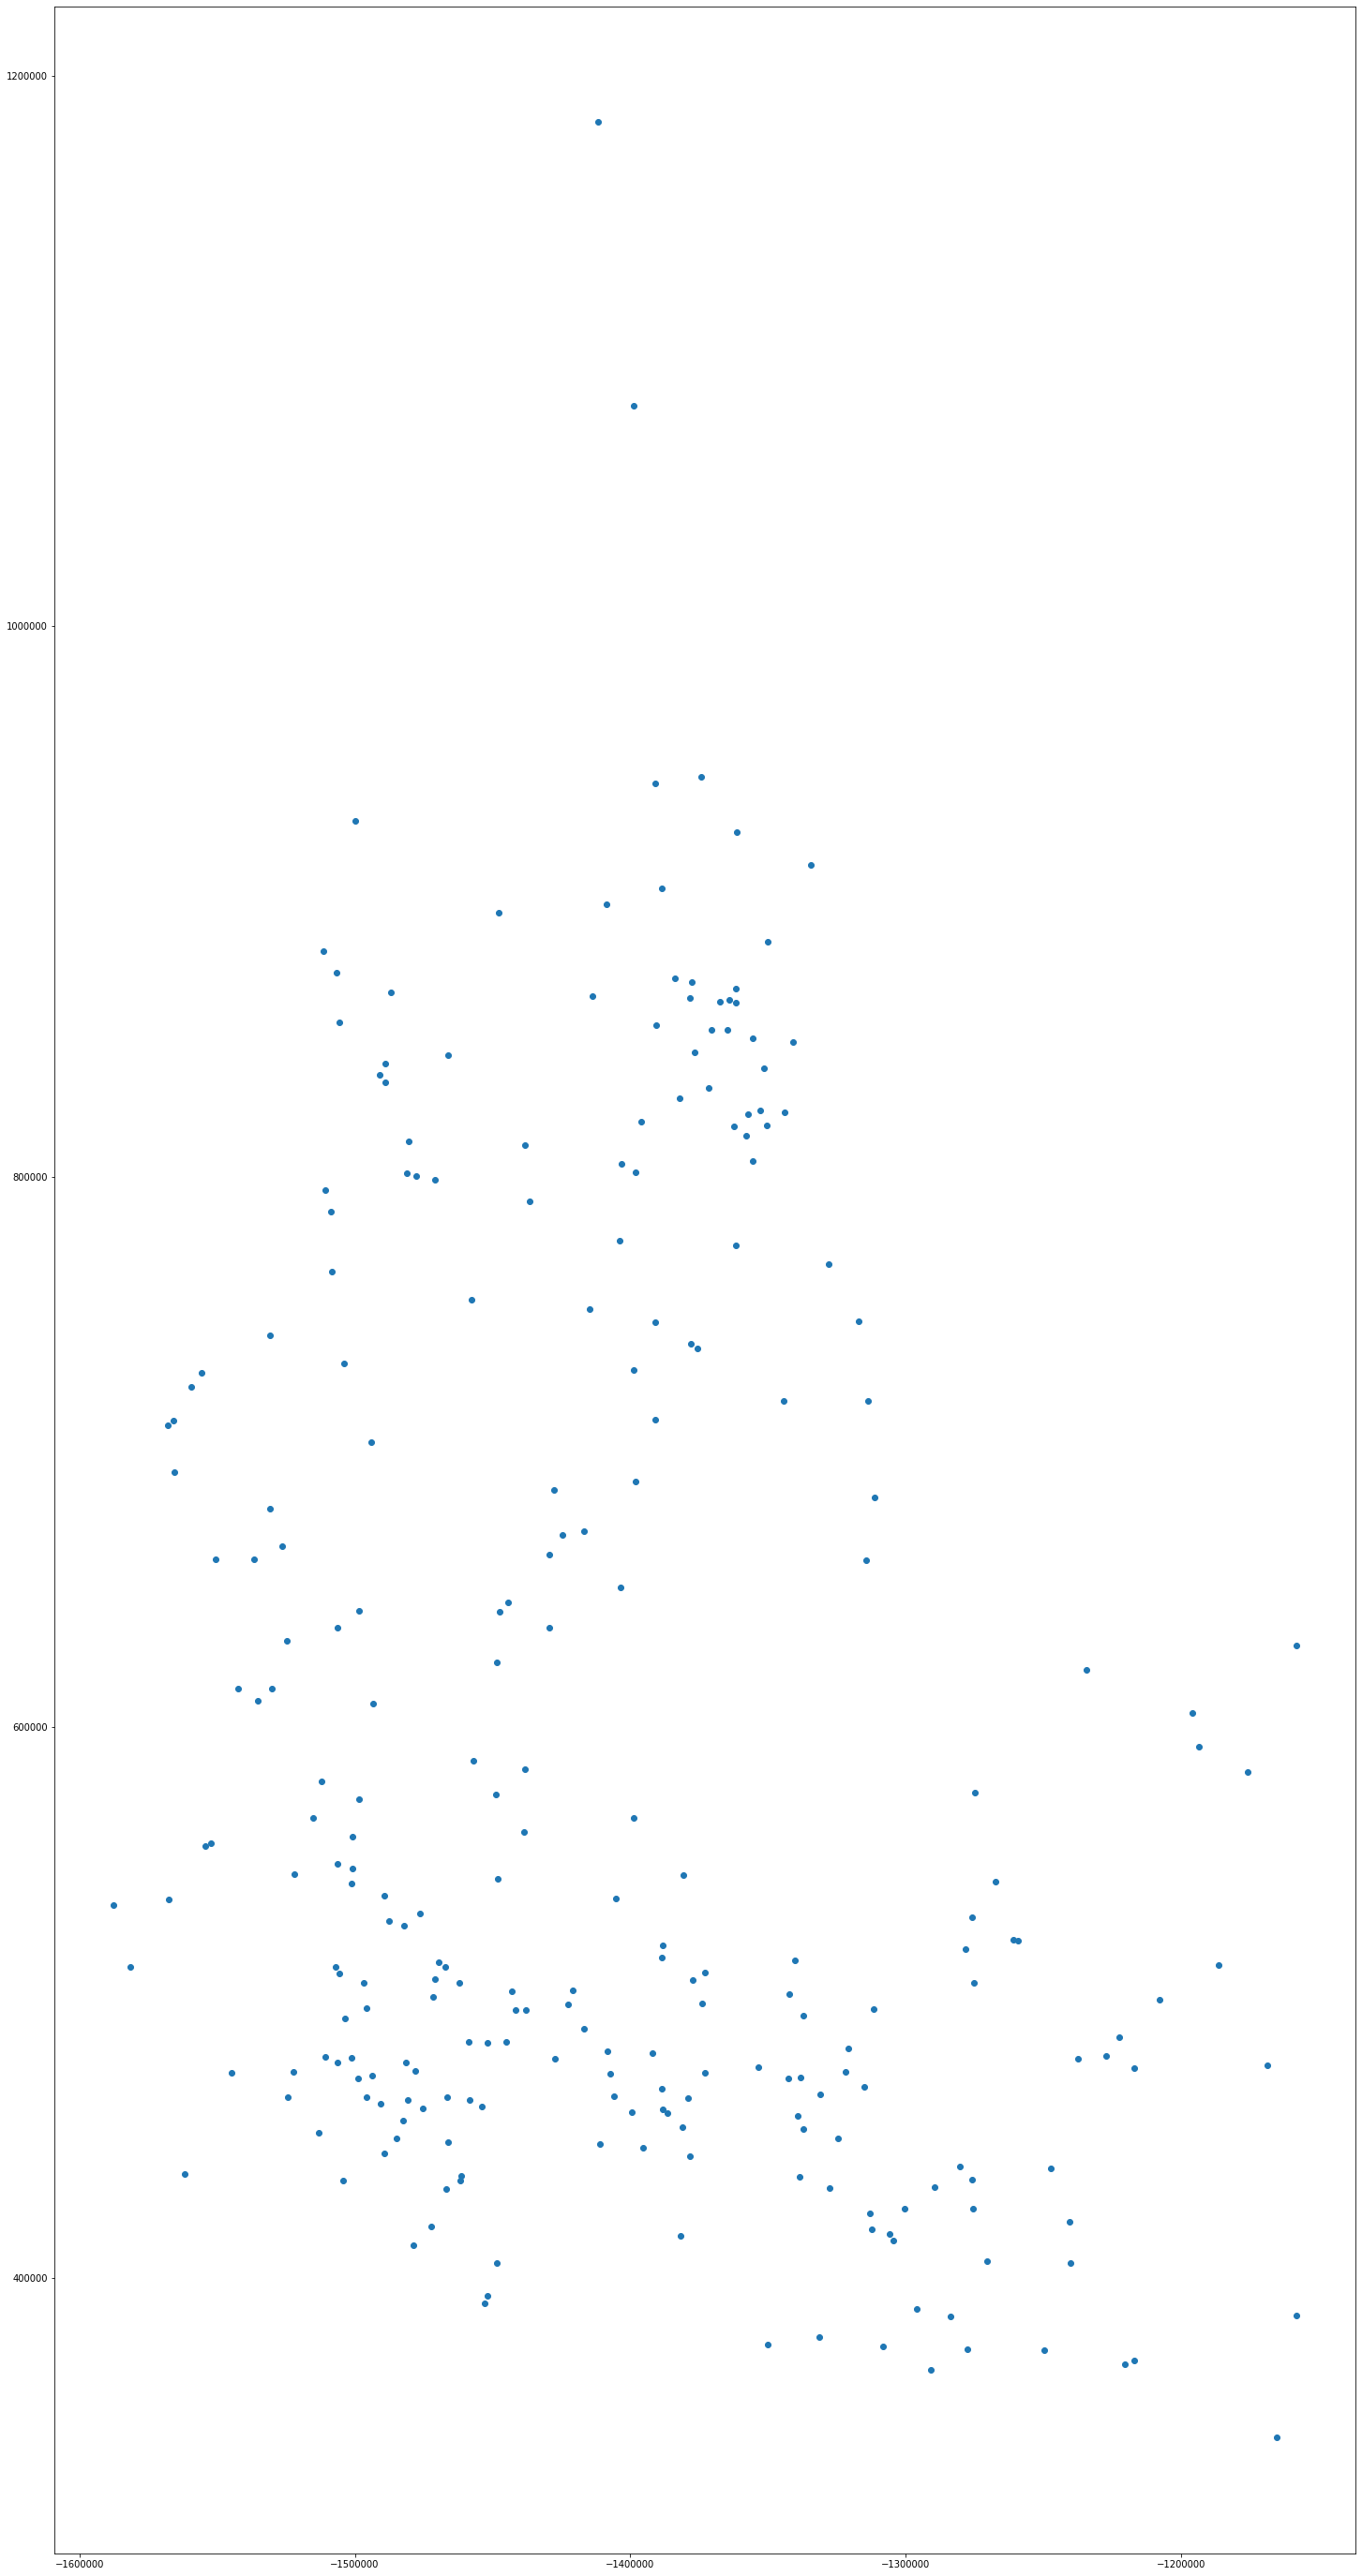

In [82]:
ID_fires.plot()

In [87]:
import pickle

filehand = open('ID_Zillow_pickled','wb')
pickle.dump(ID, filehand)

file = open('ID_fires','wb')
pickle.dump(ID_fires, file)

In [1]:
1+1

2

In [6]:
# ## Start here for Idaho
# import pandas as pd
# import numpy as np
# import os
# import glob
# import geopandas
# import matplotlib.pyplot as plt

# %matplotlib inline

# pd.options.display.max_columns = None


# Mainpath = '/data/yoder/DensityProject'
# os.chdir(Mainpath)


In [7]:
# import pickle
# filepi = open('ID_Zillow_pickled', 'rb')
# ID = pickle.load(filepi)

In [8]:
# filepick = open('ID_fires', 'rb')
# ID_fires = pickle.load(filepick)

In [9]:
ID.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
ID_fires.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
# Spatial join just points and Row ID from Zillow data then merge everything back in through dask

